# MLZC_HOMEWORK_WK3

## SETUP

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

print("✅ Libraries loaded\n")
print(f"Python version: {sys.version.split()[0]}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version:  {np.__version__}")
print(f"Seaborn version:  {sns.__version__}")
print(f"Matplotlib version:  {matplotlib.__version__}")

✅ Libraries loaded

Python version: 3.12.3
Pandas version: 2.3.2
NumPy version:  2.3.2
Seaborn version:  0.13.2
Matplotlib version:  3.10.6


## DATA

In [2]:
import urllib.request

url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'
filename = 'course_lead_scoring.csv'

urllib.request.urlretrieve(url, filename)
print(f"✅ Downloaded: {filename}")

✅ Downloaded: course_lead_scoring.csv


In [3]:
df = pd.read_csv('course_lead_scoring.csv')

print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")

df.head()

Shape: 1462 rows × 9 columns

Columns: ['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income', 'employment_status', 'location', 'interaction_count', 'lead_score', 'converted']

Data types:
lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

Missing values:
lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64


,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [4]:
df_copy = df.copy()

In [5]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [6]:
df_copy[categorical] = df_copy[categorical].fillna("NA")
df_copy[numerical] = df_copy[numerical].fillna(0.0)
    
print(df_copy.isnull().sum())

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64


## EDA

In [7]:
df_copy[numerical].corr()

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879
annual_income,0.009770,1.000000,0.027036,0.015610
interaction_count,-0.023565,0.027036,1.000000,0.009888
lead_score,-0.004879,0.015610,0.009888,1.000000


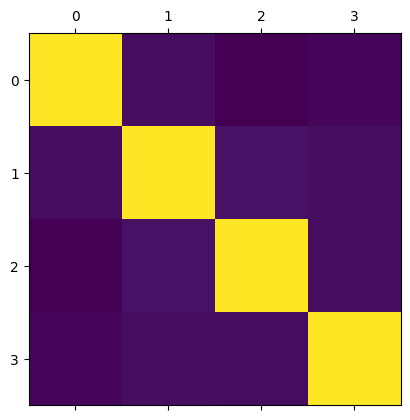

In [8]:
plt.matshow(df_copy[numerical].corr())
plt.show()

## FRAMEWORK

In [9]:
df_full_train, df_test = train_test_split(df_copy, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [10]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

## ONE-HOT ENCODING

In [11]:
from sklearn.feature_extraction import DictVectorizer

In [12]:
dicts = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts)

In [13]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

## TRAINING

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [16]:
y_pred = model.predict_proba(X_val)[:,1]
conversion = y_pred >= 0.5
round((y_val == conversion).mean(), 2)

np.float64(0.7)

In [17]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = conversion.astype(int)
df_pred['actual'] = y_val

In [18]:
def create_framework(df, categorical, numerical):
    df_copy = df.copy()

    df_copy[categorical] = df_copy[categorical].fillna("NA")
    df_copy[numerical] = df_copy[numerical].fillna(0.0)

    df_full_train, df_test = train_test_split(df_copy, test_size=0.2, random_state=42)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.converted.values
    y_val = df_val.converted.values
    y_test = df_test.converted.values

    del df_train['converted']
    del df_val['converted']
    del df_test['converted']
    
    return df_train, df_val, df_test, y_train, y_val, y_test

In [19]:
def prepare_data(features, df_train, df_val):
    
    dicts = df_train[features].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    
    X_train = dv.fit_transform(dicts)
    
    val_dicts = df_val[features].to_dict(orient='records')
    X_val = dv.transform(val_dicts)
    
    return X_train, X_val
    

In [31]:
def train_model(X_train, y_train, C=1.0):
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    return model


In [21]:
def calculate_accuracy(model, X_val, y_val):
    y_pred = model.predict_proba(X_val)[:,1]
    conversion = y_pred >= 0.5
    accuracy = (y_val == conversion).mean()
    
    return accuracy

In [22]:
def feature_elimination_pipleline():
    
    categorical = ['lead_source', 'industry', 'employment_status', 'location']
    numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

    df_train, df_val, df_test, y_train, y_val, y_test = create_framework(df, categorical, numerical)
    
    features = categorical + numerical
    
    X_train, X_val = prepare_data(features, df_train, df_val)
    
    model = train_model(X_train, y_train)

    baseline_accuracy = calculate_accuracy(model, X_val, y_val)

    print(f"baseline accuracy: {baseline_accuracy}")
    
    for feature in features:
        features_subset = features.copy()
        features_subset.remove(feature)

        X_train, X_val = prepare_data(features_subset, df_train, df_val)
        
        model = train_model(X_train, y_train)

        accuracy = calculate_accuracy(model, X_val, y_val)

        difference = accuracy - baseline_accuracy  # Positive = improvement, Negative = worse

        print("=================================")
        print(f"Feature tested: {feature}")
        print(f"Accuracy WITHOUT this feature: {accuracy:.4f}")
        print(f"Baseline accuracy (all features): {baseline_accuracy:.4f}")

        if difference > 0:
            print(f"✅ IMPROVES accuracy by: +{difference:.4f}")
        elif difference < 0:
            print(f"❌ WORSENS accuracy by: {difference:.4f}")
        else:
            print(f"➖ NO CHANGE in accuracy")
            
        print("=================================\n")

In [23]:
def regularised_pipleline():
    categorical = ['lead_source', 'industry', 'employment_status', 'location']
    numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

    df_train, df_val, df_test, y_train, y_val, y_test = create_framework(df, categorical, numerical)
    
    features = categorical + numerical
    
    X_train, X_val = prepare_data(features, df_train, df_val)  # Move outside loop
    
    c_params = [0.01, 0.1, 1, 10, 100]
    
    for C in c_params:
        model = train_model(X_train, y_train, C)
        
        # Add these debug lines:
        print(f"\nC = {C}")
        accuracy = calculate_accuracy(model, X_val, y_val)
        print(f"Accuracy: {accuracy:.3f}")
        print("="*50)

In [24]:
regularised_pipleline()


C = 0.01
Accuracy: 0.700

C = 0.1
Accuracy: 0.700

C = 1
Accuracy: 0.700

C = 10
Accuracy: 0.700

C = 100
Accuracy: 0.700


## MODEL

## QUESTIONS

In [25]:
# Q1: What is the most frequent observation (mode) for the column industry?
df_copy['industry'].value_counts()

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

In [26]:
# Q2: What are the two features that have the biggest correlation?
df_copy[numerical].corr()


,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879
annual_income,0.009770,1.000000,0.027036,0.015610
interaction_count,-0.023565,0.027036,1.000000,0.009888
lead_score,-0.004879,0.015610,0.009888,1.000000


In [27]:
mutual_info_score(df_full_train.converted, df_full_train.industry)


0.011684562750165564

In [28]:
# Q3: Which of these variables has the biggest mutual information score?
for col in categorical:
    mutual_info = round(mutual_info_score(df_full_train.converted, df_full_train[col]), 2)
    print(f"mutual info between {col} & target variable: {mutual_info}")

mutual info between lead_source & target variable: 0.03
mutual info between industry & target variable: 0.01
mutual info between employment_status & target variable: 0.01
mutual info between location & target variable: 0.0


In [29]:
# Q4: Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
round((y_val == conversion).mean(), 2)

np.float64(0.7)

In [32]:
# Q5: Which of following feature has the smallest difference?
feature_elimination_pipleline()

baseline accuracy: 0.6996587030716723
Feature tested: lead_source
Accuracy WITHOUT this feature: 0.7031
Baseline accuracy (all features): 0.6997
✅ IMPROVES accuracy by: +0.0034

Feature tested: industry
Accuracy WITHOUT this feature: 0.6997
Baseline accuracy (all features): 0.6997
➖ NO CHANGE in accuracy

Feature tested: employment_status
Accuracy WITHOUT this feature: 0.6962
Baseline accuracy (all features): 0.6997
❌ WORSENS accuracy by: -0.0034

Feature tested: location
Accuracy WITHOUT this feature: 0.7099
Baseline accuracy (all features): 0.6997
✅ IMPROVES accuracy by: +0.0102

Feature tested: number_of_courses_viewed
Accuracy WITHOUT this feature: 0.5563
Baseline accuracy (all features): 0.6997
❌ WORSENS accuracy by: -0.1433

Feature tested: annual_income
Accuracy WITHOUT this feature: 0.8532
Baseline accuracy (all features): 0.6997
✅ IMPROVES accuracy by: +0.1536

Feature tested: interaction_count
Accuracy WITHOUT this feature: 0.5563
Baseline accuracy (all features): 0.6997
❌ WO

In [ ]:
# Q6 Which of these C leads to the best accuracy on the validation set?
regularised_pipleline()



C = 0.01
Accuracy: 0.700

C = 0.1
Accuracy: 0.700

C = 1
Accuracy: 0.700

C = 10
Accuracy: 0.700

C = 100
Accuracy: 0.700
